# Euro Exchange Rates 1999-2022

## Introduction

The dataset we'll use describes Euro daily exchange rates between 1999 and 2022. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Daria Chemkaeva put together [the data set](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) using information from the European Central Bank. Note that the dataset gets regular updates — we downloaded it in September 2022.

In this exercise, we will use the Euro daily exchange rates to Look at how three of the top five non-Euro economies fared during the Coronavirus outbreak relative to the Euro. In 2022, those countries are the United States, China, Japan, India, and the United Kingdom per [ceoworld.biz](https://ceoworld.biz/2022/09/05/the-worlds-largest-economies-2022/).

### Importing and Inspecting Data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
sns.set_theme()
exchange_rates = pd.read_csv('../Datasets/euro-daily-hist_1999_2022.csv')

Most variables are units and self-explanatory. The first vairable (index 0) is the date at which the ratio of the currency to the Euro applies.

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-06-15,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.5290,18.0465,1.0431,16.7111
1,2022-06-14,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.5660,18.0600,1.0452,16.7959
2,2022-06-13,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.4250,18.0495,1.0455,16.8070
3,2022-06-10,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.7740,18.0116,1.0578,16.5209
4,2022-06-09,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.0790,18.5104,1.0743,16.4132


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6063,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6064,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6065,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6066,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6067,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

We can see that the variable names all need to be cleaned of non-letter characters and have underscores added. Several currencies hvae null values and most are being treated as strings rather than numbers. We will need to convert these.

## Cleaning the Data

First, we'll clean up the column names, removing special characters, trimming white space, and adding underscores instead of spaces.

In [5]:
curr_cols = exchange_rates.columns

In [6]:
new_cols = curr_cols.str.replace('[', '')
new_cols = new_cols.str.replace(']', '')
new_cols = new_cols.str.replace(':', '')
new_cols = new_cols.str.strip()
new_cols = new_cols.str.replace(' ', '_')

In [7]:
print(new_cols)

Index(['Period\Unit', 'Australian_dollar', 'Bulgarian_lev', 'Brazilian_real',
       'Canadian_dollar', 'Swiss_franc', 'Chinese_yuan_renminbi',
       'Cypriot_pound', 'Czech_koruna', 'Danish_krone', 'Estonian_kroon',
       'UK_pound_sterling', 'Greek_drachma', 'Hong_Kong_dollar',
       'Croatian_kuna', 'Hungarian_forint', 'Indonesian_rupiah',
       'Israeli_shekel', 'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats', 'Maltese_lira',
       'Mexican_peso', 'Malaysian_ringgit', 'Norwegian_krone',
       'New_Zealand_dollar', 'Philippine_peso', 'Polish_zloty', 'Romanian_leu',
       'Russian_rouble', 'Swedish_krona', 'Singapore_dollar',
       'Slovenian_tolar', 'Slovak_koruna', 'Thai_baht', 'Turkish_lira',
       'US_dollar', 'South_African_rand'],
      dtype='object')


In [8]:
exchange_rates.columns = new_cols

Next, we'll change `Period/Unit` to `Time` for the sake of readability. and make it into a datetime variable.

In [9]:
exchange_rates.rename(columns={'Period\\Unit': 'Time'},
                      inplace=True)

In [10]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Looking over the currency columns in the csv, we can see that missing values are marked with a '-'. We want all columns to be numeric and not have dashes, so we'll loop through and replace them, converting the columns to float.

In [11]:
all_cols = exchange_rates.columns.values

In [12]:
for col in all_cols[1:]:
    exchange_rates[exchange_rates[col] == '-'] = np.nan
    exchange_rates[col] = exchange_rates[col].astype(float)

## Analyzing the Data

### Preliminary Plotting

To begin, let's take a look at the Euro to US Dollar exchange rate over time to think about how we will plot the data.

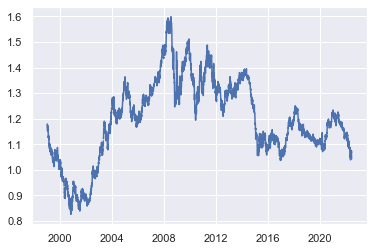

In [13]:
plt.plot(exchange_rates['Time'],
         exchange_rates['US_dollar'])
plt.show()

But let's go ahead and remove daily variation by taking a rolling mean instead of the actual values. Since the data set covers a long period of time, let's use a 30 day rolling mean to really smooth things out.

In [14]:
exchange_rates['US_dollar_rolling_30d'] = exchange_rates['US_dollar'].rolling(30).mean(skipna=True)

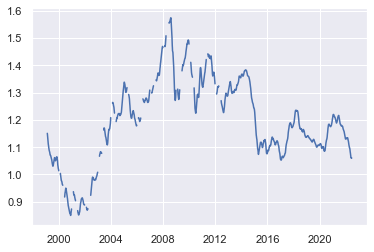

In [15]:
plt.plot(exchange_rates['Time'],
         exchange_rates['US_dollar_rolling_30d'])
plt.show()

We notice a lot of breaks in the graph--likely due to missing values. Let's see if they go away when eliminating missing values.

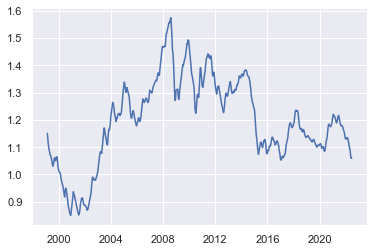

In [16]:
plt.plot(exchange_rates.loc[exchange_rates['US_dollar_rolling_30d'].notna(),'Time'],
         exchange_rates.loc[exchange_rates['US_dollar_rolling_30d'].notna(),'US_dollar_rolling_30d'])
plt.show()

Yep. That does it. This graph is a lot smoother than the daily graph.

### Subsetting and Plotting Countries of Interest

Now, we'll create a new dataset that looks only at countries we are analyzing for the current exercise.

In [17]:
er_top5_0 = exchange_rates[['Time', 'US_dollar', 'Chinese_yuan_renminbi', 'Japanese_yen', 'Indian_rupee', 'UK_pound_sterling']]

Really, we only want the data starting in 2019. Let's extract the year from the time variable, then remove data points before 2019.

In [18]:
er_top5_years = er_top5_0['Time'].dt.year
er_top5 = er_top5_0[er_top5_years >= 2019]

In [19]:
er_top5.describe()

,US_dollar,Chinese_yuan_renminbi,Japanese_yen,Indian_rupee,UK_pound_sterling
count,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1.141609,7.659665,125.763521,83.623282,0.871102
std,0.043355,0.292507,5.446434,4.012391,0.024706
min,1.038500,6.880500,114.650000,76.272000,0.823880
25%,1.109625,7.580675,121.295000,79.324625,0.852013
50%,1.131850,7.724150,125.375000,84.167500,0.863605
75%,1.180200,7.836425,129.815000,87.178125,0.894195
max,1.233800,8.263700,143.930000,90.595500,0.929850


Let's look at a description of the data.

The data are on very different scales, with UK and US currencies being close to 1, but Japanese yen having a mean of 125.76! We want the different currencies on a similar scale, so let's standardize them relative to the earlier data. This way, the variable for each currency will reflect how many standard deviations it is above or below the mean relative to the euro for the 20 years prior to the current period.

To do this, we'll first take the mean and standard deviation of the data before 2019. Afterward, we'll subtract the 1999-2018 mean from each data point and divide the answer by the 1999-2018 standard deviation.

In [20]:
er_top5_1999_2018 = er_top5_0[er_top5_years < 2019]

In [21]:
er_top5_1999_2018_mean = er_top5_1999_2018.iloc[:,1:].mean(skipna=True)
er_top5_1999_2018_std = er_top5_1999_2018.iloc[:,1:].std(skipna=True)
print(er_top5_1999_2018_mean)
print(er_top5_1999_2018_std)

US_dollar                  1.206529
Chinese_yuan_renminbi      8.691561
Japanese_yen             127.543507
Indian_rupee              62.691663
UK_pound_sterling          0.756309
dtype: float64
US_dollar                 0.168434
Chinese_yuan_renminbi     1.187785
Japanese_yen             16.622527
Indian_rupee             12.191397
UK_pound_sterling         0.098053
dtype: float64


In [22]:
er_top5_z = er_top5.copy()
# subset so there aren't nulls being put to these operations
for i in range(5):
    er_top5_z.iloc[:,i+1] = \
    (er_top5_z.iloc[:,i+1] - er_top5_1999_2018_mean[i]) / er_top5_1999_2018_std[i]

Let's also get 30-day rolling averages for each currency rather than the daily data. We'll put each country into a dictionary entry with the `Time` variable.

In [23]:
er_top5_z_d = {}
for c in er_top5_z.columns.values[1:]:
    timecol = er_top5_z['Time']
    rol_mean = er_top5_z[c].rolling(30).mean(skipna=True)
    curr_df = pd.DataFrame({'Time':timecol,'{0}_30d'.format(c):rol_mean}) 
    er_top5_z_d["{0}_30d".format(c)] = curr_df

Let's plot them together to see whether they should be in one plot.

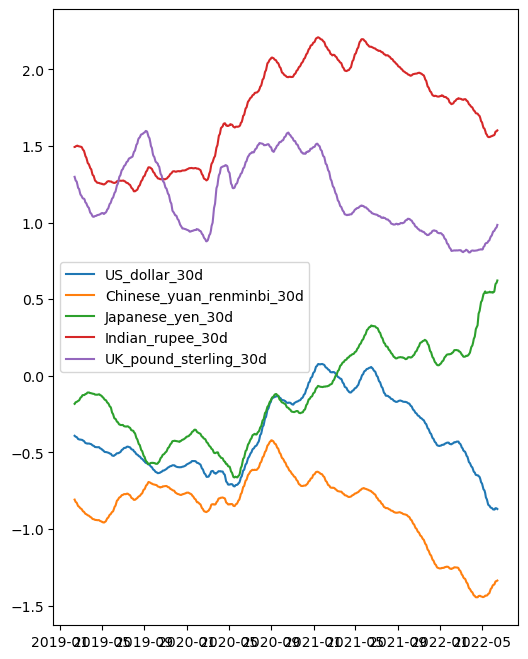

In [24]:
style.use('default')
plt.figure(figsize=(6,8))
for key in er_top5_z_d.keys():
    plt.plot(er_top5_z_d[key].loc[er_top5_z_d[key][key].notna(), 'Time'],
             er_top5_z_d[key].loc[er_top5_z_d[key][key].notna(), key], 
             label=key)
    
plt.legend(labels=er_top5_z_d.keys())
plt.show()

It Looks like they'll be fine together in one plot.

The plot needs some work, however, to tell a story. Here's what we'll change:
* Take away the axes and the ticks 
* keep only the x labels for years
* keep only the y labels for 0, 1, and 2 SDs, and label them as such
* Move the line labels to the end of the lines and simplify them.
* Thicken and darken line for every 6 months from the first case of Covid in the country and add small hash lines at these markers. There will be 5 segments of darkening.
  * US's first case was 2020-01-20.
  * China's first case was 2019-12-31.
  * Japan's first case was 2020-01-16.
  * India's first case was 2020-01-27.
  * The UK's first case was 2020-01-23.

## Conclusion

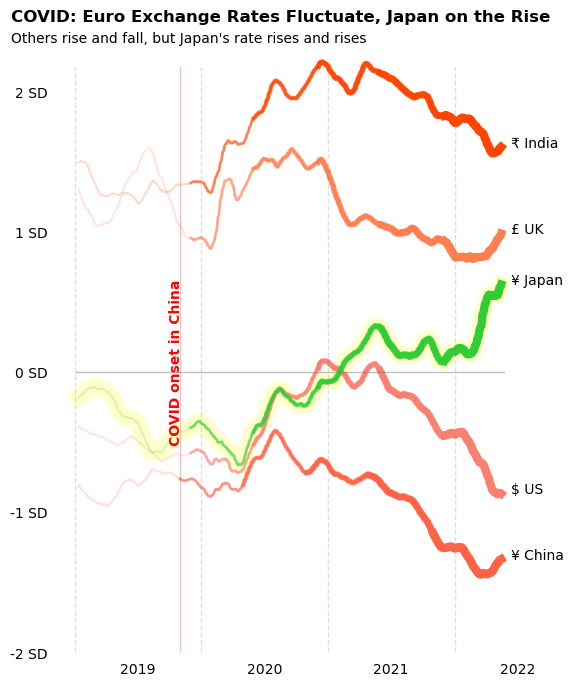

In [42]:
import matplotlib.dates as dates

style.use('default')
fig, ax = plt.subplots(figsize=(6,8))
d_labels = ['$ US', '¥ China', '¥ Japan', '₹ India', '£ UK']

onset_dates = ['2020-01', '2019-12', '2020-01', '2020-01', '2020-01']
o_dates_6 = ['2020-07', '2020-06', '2020-07', '2020-07', '2020-07']
o_dates_12 = ['2021-01', '2020-12', '2021-01', '2021-01', '2021-01']
o_dates_18 = ['2021-07', '2021-06', '2021-07', '2021-07', '2021-07']
o_dates_24 = ['2022-01', '2021-12', '2022-01', '2022-01', '2022-01']
o_dates_all = onset_dates + o_dates_6 + o_dates_12 + o_dates_18 + o_dates_24

#color_key = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
color_key = ['salmon', 'tomato', 'limegreen', 'orangered', 'coral']

# create background yellow trace for Japan
Japan_notna = er_top5_z_d['Japanese_yen_30d'][er_top5_z_d['Japanese_yen_30d']['Japanese_yen_30d'].notna()]
ax.plot(Japan_notna['Time'],
        Japan_notna['Japanese_yen_30d'], 
        color='yellow', alpha=.2, linewidth=12)

for key, d, i in zip(er_top5_z_d.keys(), d_labels, range(5)):
    curr_var_notna = er_top5_z_d[key][er_top5_z_d[key][key].notna()]
    
    # plot base line
    ax.plot(curr_var_notna['Time'],
            curr_var_notna[key], 
            color=color_key[i], alpha=.2)
    
    # add line labels for denominations
    ax.text(x='2022-07-14', y=curr_var_notna.iloc[-1,1], s=d, color='black')
    
    ## BOLDER AND BOLDER LINES
    # onset of COVID-19
    onset_df = curr_var_notna[curr_var_notna['Time'] >= onset_dates[i]]
    ax.plot(onset_df['Time'],
            onset_df[key], 
            color=color_key[i], alpha=.6, linewidth=2)
    
    # onset of COVID-19 + 6 months
    onset6_df = curr_var_notna[curr_var_notna['Time'] >= o_dates_6[i]]
    ax.plot(onset6_df['Time'],
            onset6_df[key], 
            color=color_key[i], alpha=.7, linewidth=3)
    
    # onset of COVID-19 + 12 months
    onset12_df = curr_var_notna[curr_var_notna['Time'] >= o_dates_12[i]]
    ax.plot(onset12_df['Time'],
            onset12_df[key], 
            color=color_key[i], alpha=.8, linewidth=4)
    
    # onset of COVID-19 + 18 months
    onset18_df = curr_var_notna[curr_var_notna['Time'] >= o_dates_18[i]]
    ax.plot(onset18_df['Time'],
            onset18_df[key], 
            color=color_key[i], alpha=.9, linewidth=5)
    
    # onset of COVID-19 + 24 months
    onset24_df = curr_var_notna[curr_var_notna['Time'] >= o_dates_24[i]]
    ax.plot(onset24_df['Time'],
            onset24_df[key], 
            color=color_key[i], alpha=1, linewidth=6)

# create year labels, SD labels, and remove ticks
ax.set_xticks(['2019-08', '2020-08', '2021-08', '2022-08'])
ax.set_xticklabels(['2019', '2020', '2021', '2022'])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_yticklabels(['-2 SD', '-1 SD', '0 SD', '1 SD', '2 SD'])
ax.tick_params(bottom=False, left=False)

# remove bounding box
for location in ['left', 'right', 'top', 'bottom']: 
    ax.spines[location].set_visible(False)

# add zero line and year lines
ax.axhline(0, color='grey', linewidth=1, alpha=0.5, xmin=.04, xmax=.96)
ax.axvline('2019-02', color='grey', linestyle='--', linewidth=1, alpha=0.25, ymin=0, ymax=.95)
ax.axvline('2020-02', color='grey', linestyle='--', linewidth=1, alpha=0.25, ymin=0, ymax=.95)
ax.axvline('2021-02', color='grey', linestyle='--', linewidth=1, alpha=0.25, ymin=0, ymax=.95)
ax.axvline('2022-02', color='grey', linestyle='--', linewidth=1, alpha=0.25, ymin=0, ymax=.95)

# add Pandemic start line and text
ax.axvline('2019-12', color='red', linestyle='-', linewidth=1, alpha=0.25, ymin=0, ymax=.95)
ax.text('2019-11', -0.5, "COVID onset in China", size=10, weight='bold', color='red', rotation='vertical')

# add title and subtitle
ax.text('2018-08', 2.5, "COVID: Euro Exchange Rates Fluctuate, Japan on the Rise", 
        size=12, weight='bold')
ax.text('2018-08', 2.35, "Others rise and fall, but Japan's rate rises and rises", 
        size=10)

plt.show()

With our completed graph, we can see the story clearly. The start of the pandemic caused a rise in exchange rates of the top five currencies relative to the Euro. However, by mid-2021, the exchange rate for all currencies but Japan had peaked, returning to roughly pre-pandemic rates or lower by mid 2022. The Japanese yen, however, has continued to climb in its exchange rate, marking a continued success of its economy post-COVID onset relative to the Eurozone. This success may be due to the combination of its smaller population and its strict measures against the spread of the disease.